# Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier

In [8]:
path = "/content/drive/MyDrive/Colab Notebooks/CienciaDeDatos/02_Classification/drug200.csv"

In [26]:
df = pd.read_csv(path)

#Análsis básico

* Veamos la data

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


* Scatter plot de las masas de las frutas

# Limpieza

* Encoding, Label Encode

In [12]:
from sklearn import preprocessing

In [27]:
le_sex = preprocessing.LabelEncoder()
le_sex.fit(["F", "M"]) #paso las categorias
df["Sex"] = le_sex.transform(df["Sex"])

In [28]:
le_BP = preprocessing.LabelEncoder()
le_BP.fit(df["BP"].unique()) #paso las categorias
df["BP"] = le_BP.transform(df["BP"])

In [29]:
le_chol = preprocessing.LabelEncoder()
le_chol.fit(df["Cholesterol"].unique()) #paso las categorias
df["Cholesterol"] = le_chol.transform(df["Cholesterol"])

In [30]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,drugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,drugY


# Entrenamiento

In [31]:
from sklearn.model_selection import train_test_split

* Split target - features

In [34]:
 X = df.drop("Drug", axis=1, inplace=False)
 y = df["Drug"]

* Split train y test

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 3, test_size= 0.3)

* Creo modelo

In [37]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth=4)

* Entreno

In [38]:
drugTree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

* Predigo

In [41]:
predTree = drugTree.predict(X_test)

* Compruebo

In [40]:
y_test.head()

40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
Name: Drug, dtype: object

In [42]:
predTree[:5]

array(['drugY', 'drugX', 'drugX', 'drugX', 'drugX'], dtype=object)

* Compruebo con metrica Accuracy ( a cuantos le pego)

In [43]:
from sklearn import metrics

In [45]:
print("DeicionsTree's accuracy: \t", metrics.accuracy_score(y_test, predTree))

DeicionsTree's accuracy: 	 0.9833333333333333


* Mostremos el arbol

In [47]:
from sklearn import tree

[Text(0.625, 0.9, 'Na_to_K <= 14.615\nentropy = 1.929\nsamples = 140\nvalue = [16, 11, 11, 33, 69]\nclass = drugB'),
 Text(0.5, 0.7, 'BP <= 0.5\nentropy = 1.832\nsamples = 71\nvalue = [16, 11, 11, 33, 0]\nclass = drugA'),
 Text(0.25, 0.5, 'Age <= 50.5\nentropy = 0.975\nsamples = 27\nvalue = [16, 11, 0, 0, 0]\nclass = drugY'),
 Text(0.125, 0.3, 'entropy = 0.0\nsamples = 16\nvalue = [16, 0, 0, 0, 0]\nclass = drugY'),
 Text(0.375, 0.3, 'entropy = 0.0\nsamples = 11\nvalue = [0, 11, 0, 0, 0]\nclass = drugC'),
 Text(0.75, 0.5, 'Cholesterol <= 0.5\nentropy = 0.811\nsamples = 44\nvalue = [0, 0, 11, 33, 0]\nclass = drugA'),
 Text(0.625, 0.3, 'BP <= 1.5\nentropy = 0.998\nsamples = 21\nvalue = [0, 0, 11, 10, 0]\nclass = drugX'),
 Text(0.5, 0.1, 'entropy = 0.0\nsamples = 11\nvalue = [0, 0, 11, 0, 0]\nclass = drugX'),
 Text(0.75, 0.1, 'entropy = 0.0\nsamples = 10\nvalue = [0, 0, 0, 10, 0]\nclass = drugA'),
 Text(0.875, 0.3, 'entropy = 0.0\nsamples = 23\nvalue = [0, 0, 0, 23, 0]\nclass = drugA'),
 T

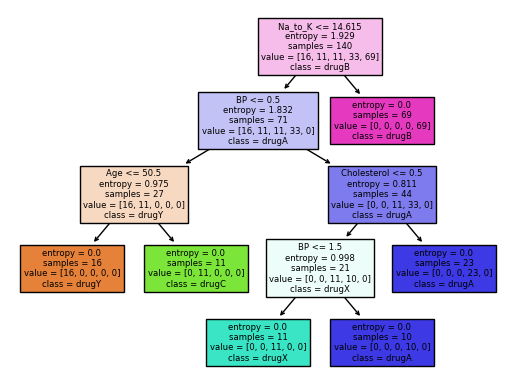

In [48]:
tree.plot_tree(drugTree, feature_names=X.columns, class_names=y.unique(),filled=True)

* Grafiquemos

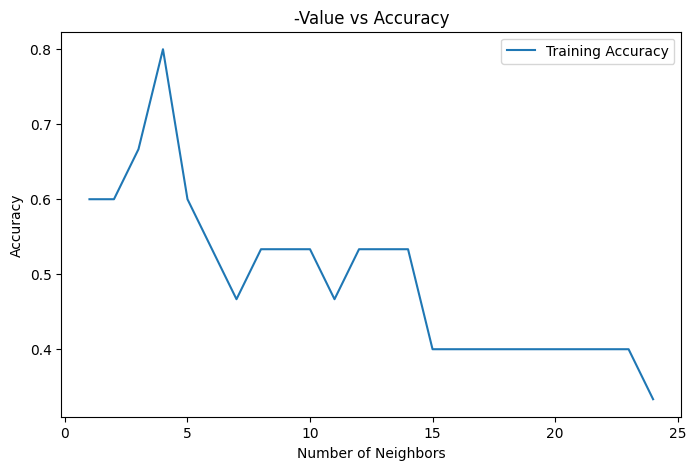

In [ ]:
plt.figure(figsize=[8,5])
plt.plot(neig, test_accuracy, label = "Training Accuracy")
plt.legend()
plt.title("-Value vs Accuracy")
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

plt.show()

* Comunicquemos

In [ ]:
test_accuracy = np.array(test_accuracy)

In [ ]:
print("Best accuracy is {} with k = {}".format(test_accuracy.max(), test_accuracy.argmax()+1) )

Best accuracy is 0.8 with k = 4


# Hagamos el MVP (deploy), con la repdiccion y eso

In [ ]:
#predicion = knn.predict()

In [ ]:
#array([2])

In [ ]:
#t_test.head(2)

# Mismo proceso, pero normlizando los datos

* Imports

In [ ]:
from sklearn.preprocessing import StandardScaler

* Scaler

In [ ]:
X = pd.DataFrame(StandardScaler().fit(X).transform(X))

In [ ]:
X.head()

,0,1,2,3
0,0.529442,1.598690,-0.291397,-2.793595
1,0.309462,1.104854,-0.661922,-2.268684
2,0.236136,0.364100,-0.365502,-2.137456
3,-1.413709,-1.117409,-2.218131,0.487100
4,-1.450372,-1.364327,-2.292236,0.355872


* Volvemos a dejar los nombrs antiguos de las columnas

In [ ]:
df.rename(columns={"0": "mass", "1":"width", "2":"height", "3":"color_score"}, inplace=True)

*Split train-test

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=4)

* Entrenamiento y prueba

In [ ]:
knn = KNeighborsClassifier(n_neighbors=4)

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [ ]:
knn.score(X_test, y_test)

1.0

* Comprobacion

In [ ]:
knn.predict(X_test.head(2))

array([2, 1])

In [ ]:
y_test[0:2]

4     2
20    1
Name: fruit_label, dtype: int64